In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import (
    #OneHotEncoder,
    #StandardScaler,
    #MinMaxScaler
#)
import warnings
warnings.filterwarnings("ignore")


#from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
#from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
data = pd.read_csv("/Users/wukaiti/Spiced/weekly_milstones/week_03/bike-sharing-demand/train.csv")


In [ ]:
data

In [48]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [54]:
data.head()
#data.reset_index(inplace=True)
data.set_index("datetime",inplace=True)

In [57]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

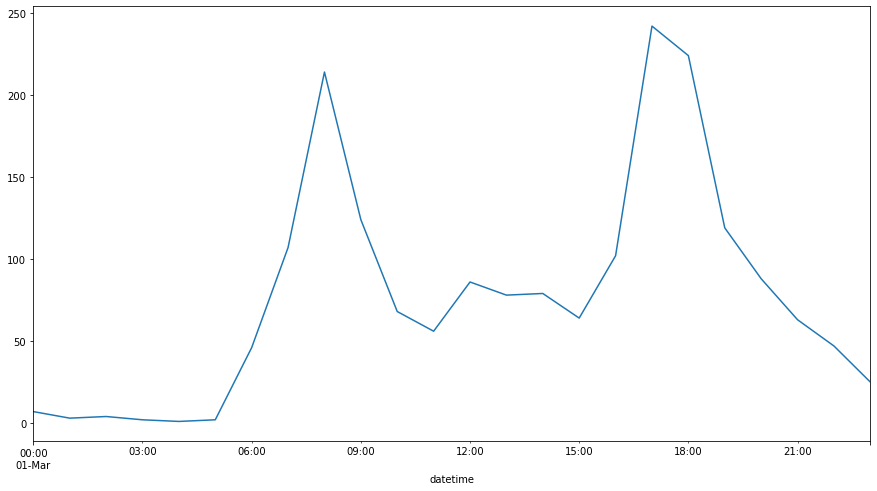

In [73]:
# distribution during workday
#count by index
data['count']['2011-03-01'].plot(figsize=(15, 8));

In [78]:
data.groupby(["temp","holiday"]).count()

season  workingday  weather  atemp  humidity  windspeed  \
temp  holiday                                                            
0.82  0             7           7        7      7         7          7   
1.64  0             2           2        2      2         2          2   
2.46  0             5           5        5      5         5          5   
3.28  0            11          11       11     11        11         11   
4.10  0            40          40       40     40        40         40   
...               ...         ...      ...    ...       ...        ...   
37.72 0            31          31       31     31        31         31   
      1             3           3        3      3         3          3   
38.54 0             7           7        7      7         7          7   
39.36 0             6           6        6      6         6          6   
41.00 0             1           1        1      1         1          1   

               casual  registered  count  
temp  holiday                             
0.82  0             7           7      7  
1.64  0             2           2      2  
2.46  0             5           5      5  
3.28  0            11          11     11  
4.10  0            40          40     40  
...               ...         ...    ...  
37.72 0            31          31     31  
      1             3           3      3  
38.54 0             7           7      7  
39.36 0             6           6      6  
41.00 0             1           1      1  

[90 rows x 9 columns]

In [ ]:
# distribution during holiday